In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from MPCProblem import MPCProblem
from util import *
import cvxpy as cp
import warnings
import itertools
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
import pydotplus
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import brier_score_loss
from scipy import stats
import matplotlib.dates as md
warnings.filterwarnings('ignore')

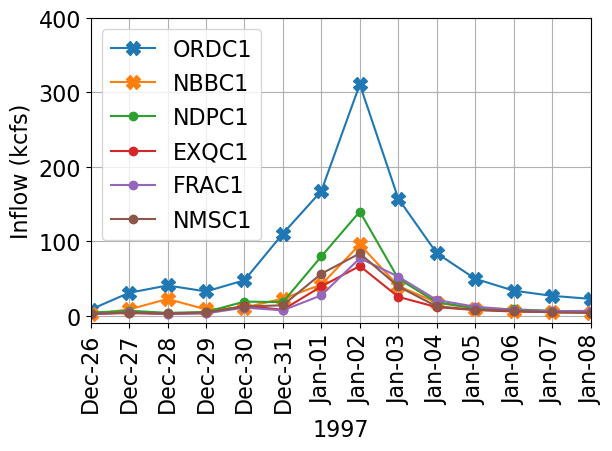

In [2]:
# figure 1b

YF_sites = ['ORDC1', 'NBBC1']
SJ_sites = ['NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']
plt.rcParams.update({'font.size': 16})
# SJ Data
df = pd.read_csv('data/Qobs-SanJoaquin.csv', index_col=0, parse_dates=True)

sites = ['NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']
period = slice('12/26/1996', '1/8/1997')

# YF data
df_yf = pd.read_csv('data/Qobs.csv', index_col=0, parse_dates=True)
period2 = pd.date_range('12/1/1996', '2/1/1997')
df_obs = pd.DataFrame(index = period2)
df_obs[['ORDC1', 'NBBC1']] = df_yf[['ORDC1', 'NBBC1']].loc[period2]
df_obs[sites] = df[sites].loc[period2]

# to TAF
# df_obs = df_obs * kcfs_to_tafd

fig, ax = plt.subplots()

colors = ['purple', 'navy']

df_obs[['ORDC1','NBBC1']].loc[period].plot(marker = "X", ax = ax,
                                           markersize = 10, legend = True)

df_obs[sites].loc[period].plot(marker = "o", ax = ax)
ax.set_ylabel('Inflow (kcfs)')
ax.set_xlabel('1997')
ax.set_xticks(df_obs.loc[period].index)
ax.set_xticklabels(df_obs.loc[period].index.strftime("%b-%d"), rotation = 90)

ax.set_ylim(-10, 400)
ax.grid()

plt.tight_layout()

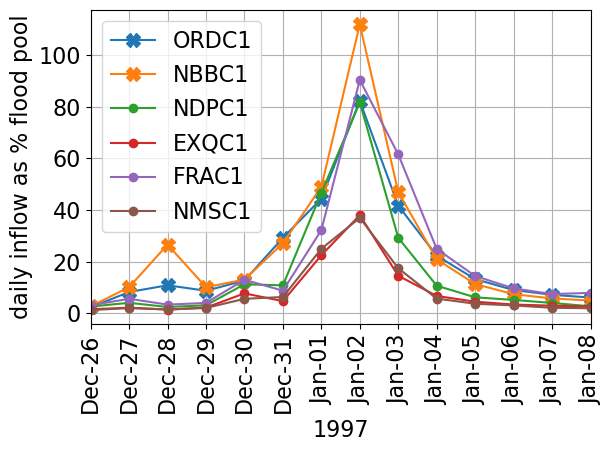

In [4]:
# figure 1c

# peak flows (FNF)
# ORDC1, NBBC1, NDPC1, EXQC1, FRAC1, NMSC1 
peak_flows = [310.995288, 95.952598, 140.088000, 67.040000, 77.467000, 83.829000] # kcfs
flood_pools = [750, 170, 340, 350, 170, 450] # TAF
sites = ['ORDC1', 'NBBC1', 'NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']
Rmax_con = [150, 50, 9, 6, 8, 8]
RR_con = [50, 14, 9, 6, 8, 8]

baseline_TOCS = [733, 211, 558, 285, 319, 355]
perfect_TOCS = [0, 0, 449, 212, 199, 234]
hefs_TOCS = [0, 0, 481, 215, 239, 282]

df_obs_per = df_obs.copy()

for site_n,site in enumerate(sites):
    df_obs_per[site] = kcfs_to_tafd * 100*df_obs[site]/flood_pools[site_n]

# for the Jan 1997 event

YF_sites = ['ORDC1', 'NBBC1']
SJ_sites = ['NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']

# SJ Data
df_sj = pd.read_csv('data/Qobs-SanJoaquin.csv', index_col=0, parse_dates=True)
# df.index = df.index + pd.Timedelta(days = 1) # wrong obs date
sites = ['ORDC1', 'NBBC1','NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']
period = slice('12/26/1996', '1/8/1997')

# YF data
df_yf = pd.read_csv('data/Qobs.csv', index_col=0, parse_dates=True)
period2 = pd.date_range('12/1/1996', '2/1/1997')
df_obs = pd.DataFrame(index = period2)
df_obs[YF_sites] = df_yf[YF_sites].loc[period2]
df_obs[SJ_sites] = df_sj[SJ_sites].loc[period2]


for site_n,site in enumerate(sites):
    df_obs[site] = kcfs_to_tafd * 100*df_obs[site]/flood_pools[site_n]

# to TAF
# df_obs = df_obs * kcfs_to_tafd

fig, ax = plt.subplots()

colors = ['purple', 'navy']

df_obs[YF_sites].loc[period].plot(marker = "X", ax = ax,
                                           markersize = 10, legend = True)


df_obs[SJ_sites].loc[period].plot(marker = "o", ax = ax)
ax.set_ylabel('daily inflow as % flood pool')
# ax.set_ylabel('Full Natural Flow (TAF/d)')
ax.set_xlabel('1997')
# ax.grid()
ax.set_xticks(df_obs.loc[period].index)
ax.set_xticklabels(df_obs.loc[period].index.strftime("%b-%d"), rotation = 90)

# ax.set_ylim(-10, 700)
# ax.set_ylim(-10, 400)
ax.grid()

plt.tight_layout()